**Homework 1: Principal Component Analysis and Linear Regression Application on Microstrip Patch Antenna Data**

**1. Data**

In the first step, the given data files and their sizes examined. For all data sets 385 trials available.

In [30]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the datasets
hw1_real = pd.read_csv("hw1_real.csv")
hw1_imaginary = pd.read_csv("hw1_img.csv")
hw1_input = pd.read_csv("hw1_input.csv")

# Ensure the data dimensions align
print("Shape of S11 real:", hw1_real.shape)
print("Shape of S11 imaginary:", hw1_imaginary.shape)
print("Shape of input parameters:", hw1_input.shape)

Shape of S11 real: (385, 201)
Shape of S11 imaginary: (385, 201)
Shape of input parameters: (385, 11)


**2. Dimensionality Reduction with PCA**

In order to get a better understanding of which input parameters have a higher effect on the system, PCA applied to the data with 95% confidence interval. The reduced dataset consists of 4 principal components.

In [ ]:
# Apply PCA to the input parameters
pca = PCA()
pca.fit(hw1_input)
explained_variance = pca.explained_variance_ratio_

# Determine the number of components explaining 95% of the variance
cumulative_variance = explained_variance.cumsum()
n_components_95 = (cumulative_variance >= 0.95).argmax() + 1

# Apply PCA with the reduced number of components
pca_reduced = PCA(n_components=n_components_95)
hw1_input_reduced = pca_reduced.fit_transform(hw1_input)

hw1_input_reduced.shape

(385, 4)

**Can we reduce the complexity of the design space by using Principal Component Analysis (PCA) to identify key parameters that most influence the S11 response of the antenna?**

Yes, it is possible to decrese the complexity of the system by PCA. PCA aims to transform the parameters into uncorrelated principal components. This way PCA captures the important patterns in the data and highlights the key components. These key components can be used to explain main feautres of the design parameters and the system responses. This way PCA shows which combination of the model parameters have the highest influence on the response and hidden correlations can be analysed.

The names of the potential principle components retrieved with the two cells below:

In [80]:
import numpy as np

# Correlation with the real part of S11 at a specific frequency index
frequency_index = 20
target_real = hw1_real.iloc[:, frequency_index]

# Compute correlations
correlations = hw1_input.corrwith(target_real).abs()

# Select top 4 features
top_features_real = correlations.sort_values(ascending=False).head(4).index
print("Top feature indices:", top_features_real)

# Filter input data for training
input_selected = hw1_input[top_features_real]

Top feature indices: Index(['height of substrate', 'width of patch',
       'dielectric constant of substrate', 'c_probe'],
      dtype='object')


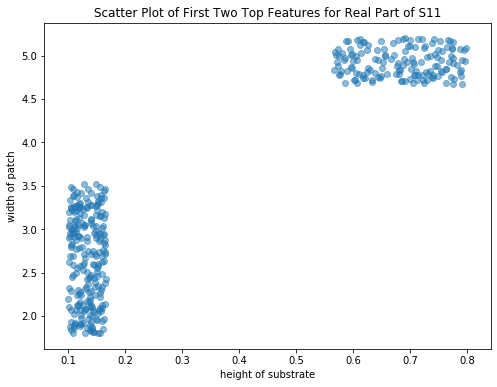

In [72]:
plt.figure(figsize=(8, 6))
plt.scatter(hw1_input[top_features_real[0]], hw1_input[top_features_real[1]], alpha=0.5)
plt.xlabel(top_features_real[0])
plt.ylabel(top_features_real[1])
plt.title('Scatter Plot of First Two Top Features for Real Part of S11')
plt.show()

In [79]:
#Apply the above cell for the imaginary part also.

# Correlation with the real part of S11 at a specific frequency index
frequency_index = 20
target_imaginary = hw1_imaginary.iloc[:, frequency_index]

# Compute correlations
correlations = hw1_input.corrwith(target_imaginary).abs()

# Select top 4 features
top_features_imaginary = correlations.sort_values(ascending=False).head(4).index
print("Top feature indices:", top_features_imaginary)

# Filter input data for training
input_selected = hw1_input[top_features_imaginary]

Top feature indices: Index(['height of substrate', 'radius of the probe',
       'dielectric constant of substrate', 'c_probe'],
      dtype='object')


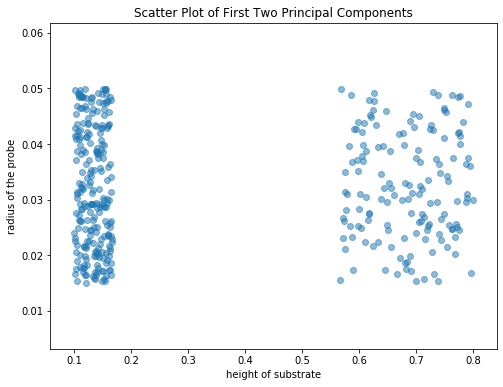

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(hw1_input[top_features_imaginary[0]], hw1_input[top_features_imaginary[1]], alpha=0.5)
plt.xlabel(top_features_imaginary[0])
plt.ylabel(top_features_imaginary[1])
plt.title('Scatter Plot of First Two Top Features for Imaginary Part of S11')
plt.show()

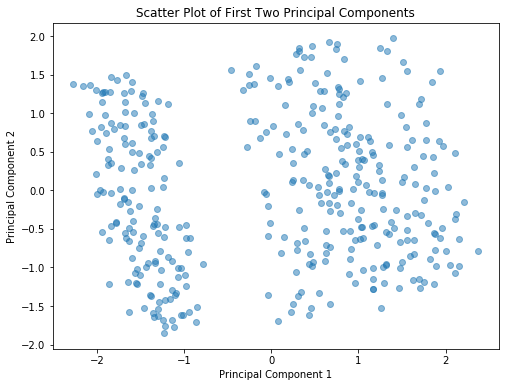

In [50]:
# Reduce to 2 components for visualization
pca_2d = PCA(n_components=2)
hw1_input_2d = pca_2d.fit_transform(hw1_input)

plt.figure(figsize=(8, 6))
plt.scatter(hw1_input_2d[:, 0], hw1_input_2d[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of First Two Principal Components')
plt.show()


**What insights can we draw from the PCA regarding the relationship between geometry and electromagnetic behavior?**

Since geometric parameters potentially make up most of the principle components, it is safe to say that electromagnatic behavior is highly affected by the geometry of the system.

In [73]:
# Split the data into training and testing sets for linear regression
X_train, X_test, y_train_real, y_test_real = train_test_split(hw1_input_reduced, target_real, test_size=0.2, random_state=42)
_, _, y_train_imag, y_test_imag = train_test_split(hw1_input_reduced, target_imaginary, test_size=0.2, random_state=42)

# Train linear regression models for real and imaginary parts
model_real = LinearRegression().fit(X_train, y_train_real)
model_imaginary = LinearRegression().fit(X_train, y_train_imag)

# Predict and calculate MSE for real and imaginary parts
y_pred_real = model_real.predict(X_test)
y_pred_imaginary = model_imaginary.predict(X_test)

mse_real = mean_squared_error(y_test_real, y_pred_real, multioutput="raw_values")
mse_imaginary = mean_squared_error(y_test_imag, y_pred_imaginary, multioutput="raw_values")

# Output PCA results and regression errors
explained_variance[:n_components_95], mse_real, mse_imaginary

(array([0.43715489, 0.23377488, 0.19402991, 0.12902049]),
 array([0.11083844]),
 array([0.15602117]))

In [78]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to hw1_input data
pca = PCA().fit(hw1_input)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

explained_variance, cumulative_variance

(array([4.37154891e-01, 2.33774875e-01, 1.94029913e-01, 1.29020487e-01,
        3.15299316e-03, 2.54900881e-03, 1.42923455e-04, 1.15632718e-04,
        2.71403176e-05, 1.93186559e-05, 1.28167536e-05]),
 array([0.43715489, 0.67092977, 0.86495968, 0.99398017, 0.99713316,
        0.99968217, 0.99982509, 0.99994072, 0.99996786, 0.99998718,
        1.        ]))

**How much of the total variance in the design parameter space can be explained by the principal components?**

The explained variance for the 11 design parameters are given in the table below. Since 4 principle components are taken into account initially, 99.39% of the variance can be explained. These results are also plotted below.

| Component | Variance Explained (%) |
|-----------|-------------------------|
| 1         | 43.72                  |
| 2         | 23.38                  |
| 3         | 19.40                  |
| 4         | 12.90                  |
| 5         | 0.32                   |
| 6         | 0.25                   |
| 7         | 0.01                   |
| 8         | 0.01                   |
| 9         | 0.00                   |
| 10        | 0.00                   |
| 11        | 0.00                   |

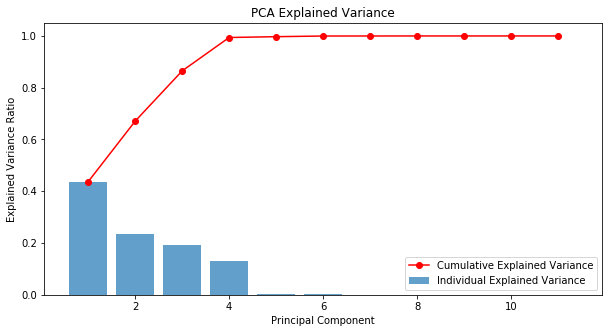

In [76]:
# Scree plot
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='r', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.legend()
plt.show()

**3. Regression Modeling for S11**

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# PCA-reduced input data
pca_n = PCA(n_components=n_components_95)
hw1_input_reduced = pca_n.fit_transform(hw1_input)

# Train-test split
X_train, X_test, y_train_real, y_test_real = train_test_split(hw1_input_reduced, target_real, test_size=0.2, random_state=42)
X_train, X_test, y_train_imag, y_test_imag = train_test_split(hw1_input_reduced, target_imaginary, test_size=0.2, random_state=42)

# Linear regression
model_real = LinearRegression().fit(X_train, y_train_real)
model_imag = LinearRegression().fit(X_train, y_train_imag)

# Predictions
y_pred_real = model_real.predict(X_test)
y_pred_imag = model_imag.predict(X_test)



**Given that S11 parameters are evaluated at 201 frequency points, predicting them simultaneously through multitarget regression may be computationally intensive and beyond the scope of the content covered so far. Instead, can we simplify the regression task by focusing on predicting S11 at a few key frequency points? For instance, selecting frequencies of interest where the behavior is most critical (e.g., resonance frequencies) can reduce the complexity of the task.**

Yes, it can siplify the task and that's why I selected frequency point at 20 in the training applications and also PCA. My frequency point selection is based on the similarity of principal component lists similarity for imaginary and real parts of the S11 values.

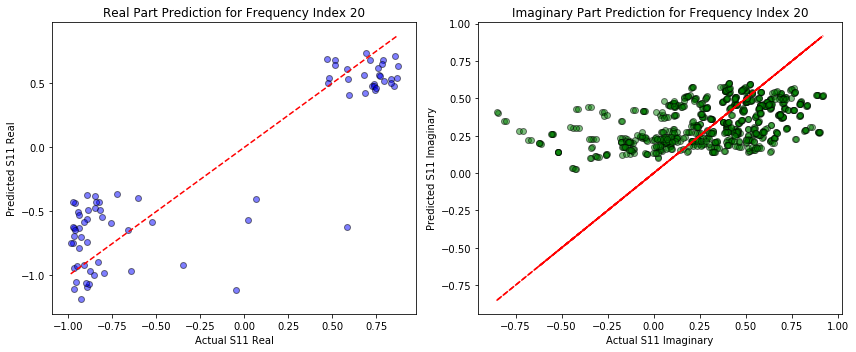

In [ ]:
# Plot actual vs predicted for real part
plt.figure(figsize=(12, 5))

# Real part plot
plt.subplot(1, 2, 1)
plt.scatter(y_test_real, y_pred_real, alpha=0.5, color='blue', edgecolor='k')
plt.plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()], 'r--')
plt.xlabel("Actual S11 Real")
plt.ylabel("Predicted S11 Real")
plt.title(f"Real Part Prediction for Frequency Index {frequency_index}")

# Imaginary part plot
plt.subplot(1, 2, 2)
plt.scatter(y_test_imag, y_pred_imag, alpha=0.5, color='green', edgecolor='k')
plt.plot([y_test_imag.min(), y_test_imag.max()], [y_test_imag.min(), y_test_imag.max()], 'r--')
plt.xlabel("Actual S11 Imaginary")
plt.ylabel("Predicted S11 Imaginary")
plt.title(f"Imaginary Part Prediction for Frequency Index {frequency_index}")

plt.tight_layout()
plt.show()

**How effective are linear regression models in predicting the real and imaginary components of S11 at these selected frequency points, based on the geometric parameters of the antenna design?**

The linear regression model is more effective in predicting the real part of the data. This is shown in the plots above.

**How do PCA and regression models compare in terms of their ability to simplify and predict the antenna's performance?**

PCA gives a more clear result compared to the linear regression. With PCA it is easy to observe how two components effect each other and also the design parameters with the highest effect of the S11. Although linear regression covers most of the points for both real and imaginary parts of the value, the regression line does not provide a satisfying representation of all the data. 